# KPIs

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## 1. Quantidade de pedidos mensal, trimestral e anual

In [2]:
orders = pd.read_csv("../datasets/trusted/delivered_orders.csv")
orders.count()

Unnamed: 0                       93011
order_id                         93011
customer_id                      93011
order_approved_at                92997
order_purchase_timestamp         93011
order_estimated_delivery_date    93011
order_delivered_carrier_date     93009
order_delivered_customer_date    93003
dtype: int64

In [3]:
purchase_time = pd.to_datetime(orders['order_purchase_timestamp'])

orders_by_year_and_month = pd.DataFrame({
        'id': orders['order_id'],
        'year': purchase_time.dt.year,
        'month': purchase_time.dt.month
})

count_by_month = orders_by_year_and_month.groupby(['year', 'month']).agg(['count'])
count_by_month

id
           count
year month      
2017 1       731
     2      1608
     3      2462
     4      2221
     5      3436
     6      3048
     7      3785
     8      4069
     9      4004
     10     4309
     11     7070
     12     5376
2018 1      6866
     2      6402
     3      6757
     4      6546
     5      6492
     6      5818
     7      5892
     8      6119

### Mensal

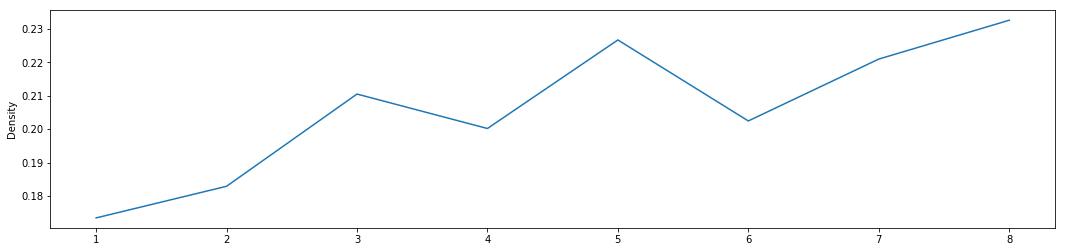

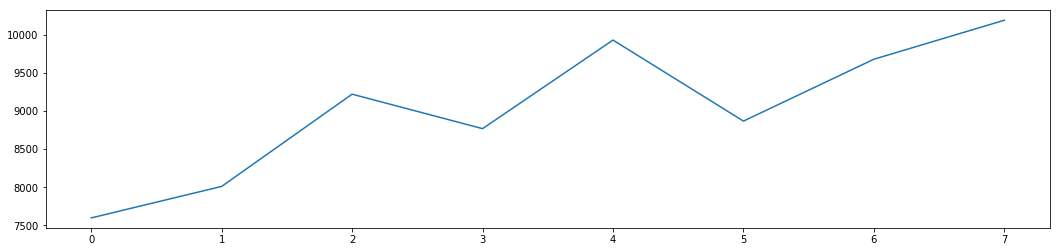

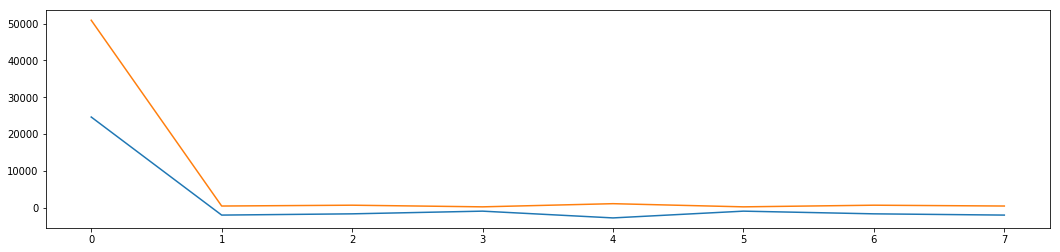

In [42]:
orders_by_year_and_month['month'][orders_by_year_and_month['month'] <= 8].plot.kde(ind=list(range(1, 9)))
plt.show()

plt.plot(count_by_month.values[:8] + count_by_month.values[12:])
plt.plot()
plt.show()

plt.plot(np.fft.fft(count_by_month[1:9], axis=0))
plt.plot(np.fft.fft(count_by_month[12:], axis=0))
plt.show()

### Trimestral

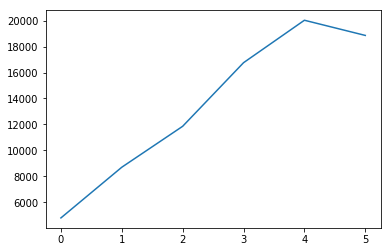

In [5]:
def trimester(year, n):
    first_month = 3 * n + 1
    return count_by_month.T[year][[first_month, first_month + 1, first_month + 2]].T.sum()

years = count_by_month.index.levels[0]
trimesters = []
for y in years:
    try:
        for i in range(4):
            trimesters.append(trimester(y, i))
    except KeyError:
        pass

plt.plot(trimesters)

### Anual

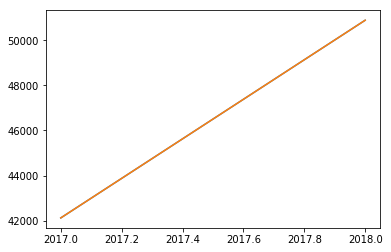

In [6]:
by_year = orders_by_year_and_month.groupby(['year']).agg(['count'])
plt.plot(by_year)

## 2. Média de valor dos pedidos

In [7]:
sold = pd.read_csv('../datasets/trusted/sold_products.csv')
sold.head()

,Unnamed: 0,product_id,order_id,price,freight_value,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_carrier_date,order_delivered_customer_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,4244733e06e7ecb4970a6e2683c13e61,00010242fe8c5a6d1ba2dd792cb16214,58.9,13.29,2017-09-13 08:59:02,2017-09-29 00:00:00,2017-09-19 18:34:16,2017-09-20 23:43:48,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,1,4244733e06e7ecb4970a6e2683c13e61,130898c0987d1801452a8ed92a670612,55.9,17.96,2017-06-28 11:52:20,2017-07-26 00:00:00,2017-07-05 12:00:33,2017-07-13 20:39:29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,2,4244733e06e7ecb4970a6e2683c13e61,532ed5e14e24ae1f0d735b91524b98b9,64.9,18.33,2018-05-18 10:25:53,2018-06-07 00:00:00,2018-05-23 14:05:00,2018-06-04 18:34:26,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,3,4244733e06e7ecb4970a6e2683c13e61,6f8c31653edb8c83e1a739408b5ff750,58.9,16.17,2017-08-01 18:38:42,2017-08-25 00:00:00,2017-08-02 19:07:36,2017-08-09 21:26:33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,4,4244733e06e7ecb4970a6e2683c13e61,7d19f4ef4d04461989632411b7e588b9,58.9,13.29,2017-08-10 21:48:40,2017-09-01 00:00:00,2017-08-11 19:43:07,2017-08-24 20:04:21,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [8]:
sold['price'].mean()

99.48807455517854

In [9]:
sold['price'].std()

92.7398465544872

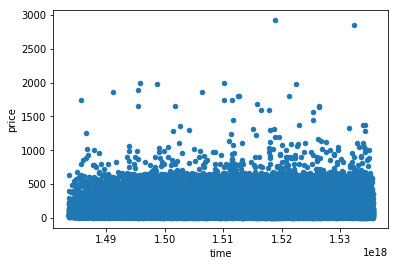

In [10]:
purchases = sold[['order_id', 'price']].groupby(['order_id']).agg(['sum'])

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

order_price_by_year_and_month = pd.DataFrame({
        'price': purchases['price']['sum'].values,
        'time': pd.to_numeric(orders['order_purchase_timestamp']),
        'year': orders['order_purchase_timestamp'].dt.year.values,
        'month': orders['order_purchase_timestamp'].dt.month.values
})
order_price_by_year_and_month.head()

order_price_by_year_and_month.plot.scatter(x='time', y='price')

In [11]:
sold['order_purchase_timestamp'] = pd.to_datetime(sold['order_purchase_timestamp'])
sold = sold.sort_values('order_purchase_timestamp')

item_price_by_year_and_month = pd.DataFrame({
        'price': sold['price'],
        'year': sold['order_purchase_timestamp'].dt.year,
        'month': sold['order_purchase_timestamp'].dt.month
})
item_price_by_year_and_month.head()

,price,year,month
72721,10.9,2017,1
99823,10.9,2017,1
74372,2.9,2017,1
90936,7.9,2017,1
87990,9.9,2017,1


In [12]:
order_price_by_year_and_month = order_price_by_year_and_month[['price', 'year', 'month']]
order_price_by_month = order_price_by_year_and_month.groupby(['year', 'month']).agg(['mean', 'std'])
order_price_by_month

price            
                  mean         std
year month                        
2017 1      115.734268  122.300404
     2      115.019795  114.165798
     3      112.629370  102.715580
     4      114.158654  109.429885
     5      113.039770  117.406218
     6      112.691388  110.415890
     7      113.827229  110.908097
     8      115.500777  114.444340
     9      112.336671  108.639570
     10     113.661659  105.189318
     11     115.157093  116.620269
     12     114.533034  112.304226
2018 1      112.748998  109.241118
     2      114.528569  117.104174
     3      116.359256  116.866630
     4      112.721170  106.724298
     5      114.197357  114.395382
     6      113.394407  108.901017
     7      113.296921  114.918198
     8      111.454331  108.644197

In [13]:
item_price_by_month = item_price_by_year_and_month.groupby(['year', 'month']).agg(['mean', 'std'])
item_price_by_month

price            
                  mean         std
year month                        
2017 1      101.737436  107.667183
     2       99.753291   95.834657
     3       99.297799   97.044858
     4      102.912837   96.694209
     5       99.223467   92.608574
     6       98.418501   93.435298
     7       96.511699   84.552491
     8       97.208672   92.427494
     9      102.367415   93.939788
     10     100.399660   95.416279
     11      98.546176   93.775188
     12     102.219253   93.963827
2018 1       98.973763   89.345260
     2       96.929409   90.268072
     3      100.991258   95.519776
     4      101.400482   93.420717
     5      100.754637   92.830601
     6       98.427139   91.049268
     7      100.722529   94.518375
     8       96.189381   88.281397

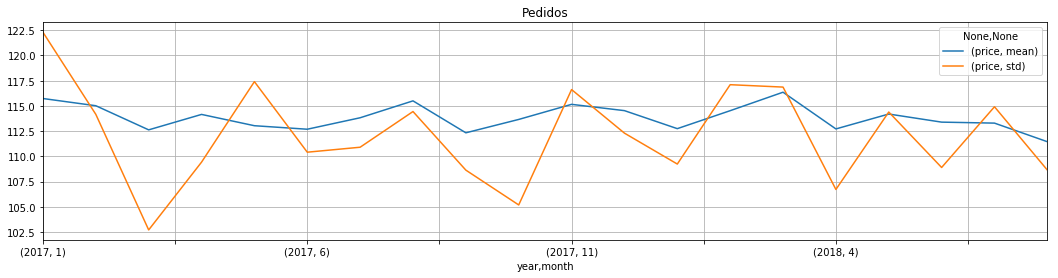

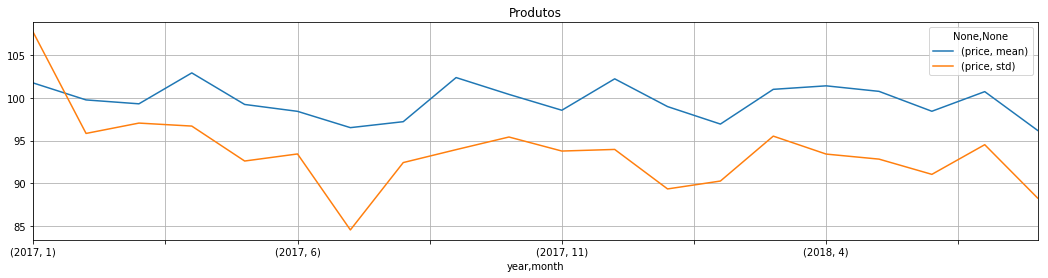

In [14]:
plt.rcParams['figure.figsize'] = (18, 4)

order_price_by_month.plot.line(title="Pedidos", grid=True)
item_price_by_month.plot.line(title="Produtos", grid=True)